In [7]:
import tf_keras as keras
from config.config import *
import numpy as np
from testing.evaluation import *

In [2]:
from training.model import create_model
from processing.preprocessing import Abstract, Dataset
from classify import *

In [3]:
loaded = create_model(name=NAME)
loaded.load_weights(SERIALIZATION_DIR.joinpath(f'{NAME}.weights.h5'))
loaded.optimizer = keras.optimizers.Adam(name='Adam')
keras.mixed_precision.set_global_policy('mixed_float16')

In [4]:
pipe = Abstract("The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once")

c:\Users\ydine\anaconda3\Lib\site-packages\spacy\default_config.cfg
c:\Users\ydine\anaconda3\Lib\site-packages\en_core_web_sm\en_core_web_sm-3.8.0\config.cfg



In [43]:
b = loaded.predict(pipe.pipeline)

1/1 [==============================] - 0s 217ms/step


In [6]:
val_dataset = Dataset.create_validation_pipeline(DF)


945/945 [==============================] - 19s 19ms/step
            BACKGROUND  CONCLUSIONS  ...     macro avg  weighted avg
precision     0.661123     0.945289  ...      0.827607      0.849803
recall        0.829806     0.746617  ...      0.770915      0.843407
f1-score      0.735922     0.834289  ...      0.784758      0.839314
support    3449.000000  4582.000000  ...  30212.000000  30212.000000

[4 rows x 8 columns]
945/945 [==============================] - 16s 17ms/step
            BACKGROUND  CONCLUSIONS  ...     macro avg  weighted avg
precision     0.661782     0.952421  ...      0.829346      0.851302
recall        0.837924     0.738324  ...      0.770083      0.844400
f1-score      0.739509     0.831817  ...      0.783972      0.839886
support    3449.000000  4582.000000  ...  30212.000000  30212.000000

[4 rows x 8 columns]
945/945 [==============================] - 18s 19ms/step
            BACKGROUND  CONCLUSIONS  ...     macro avg  weighted avg
precision     0.661458    

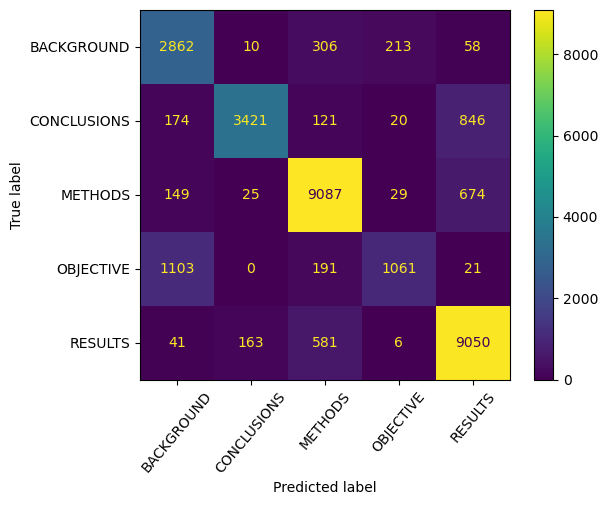

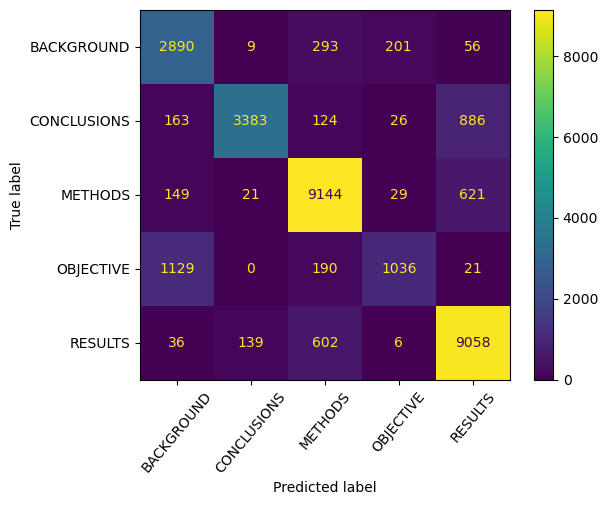

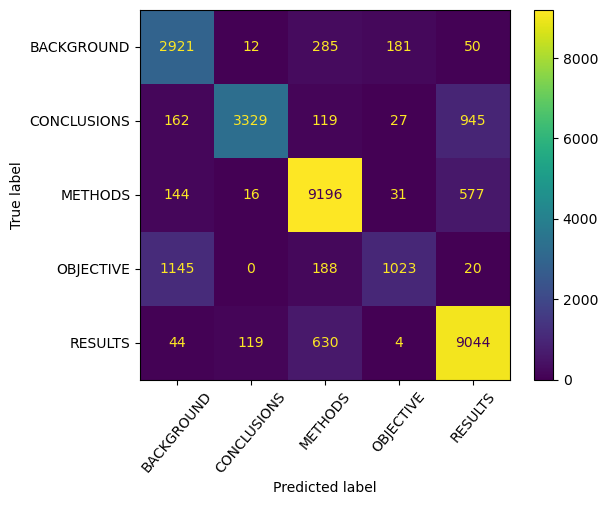

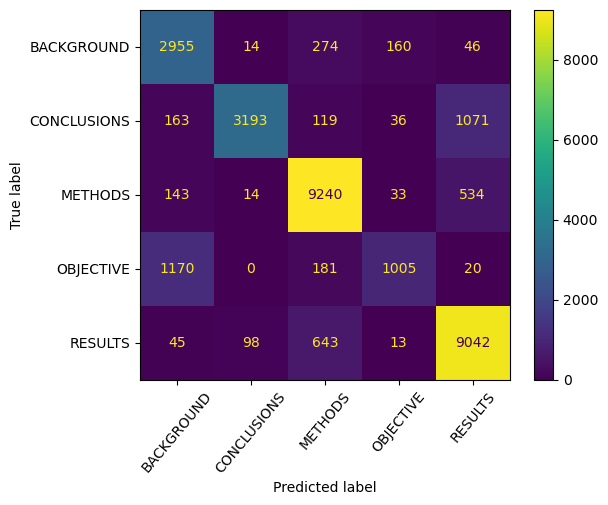

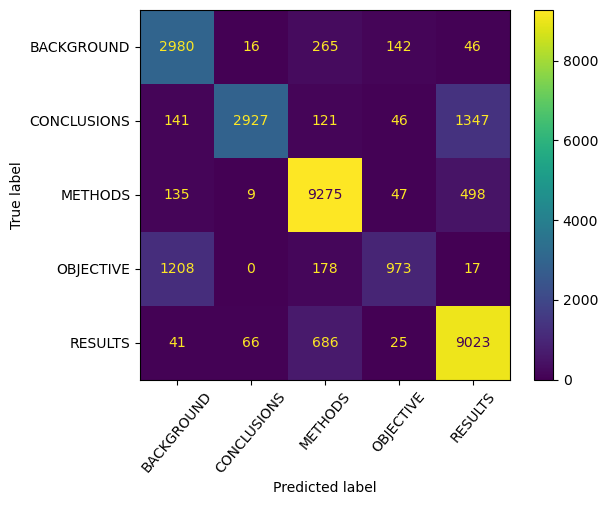

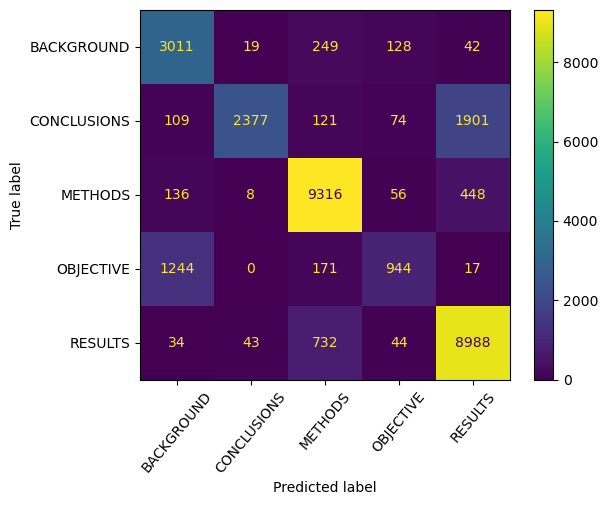

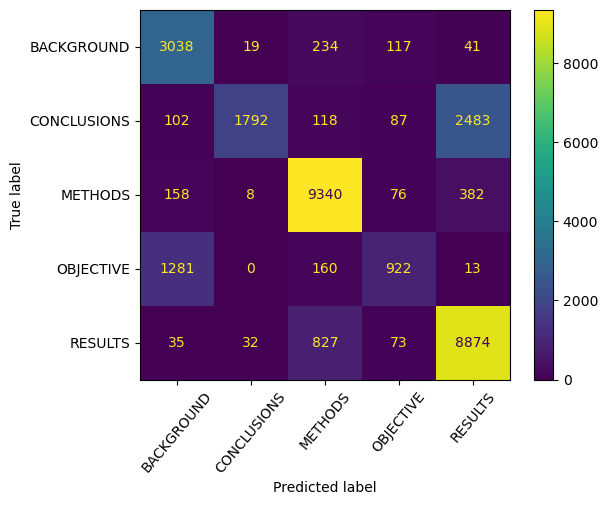

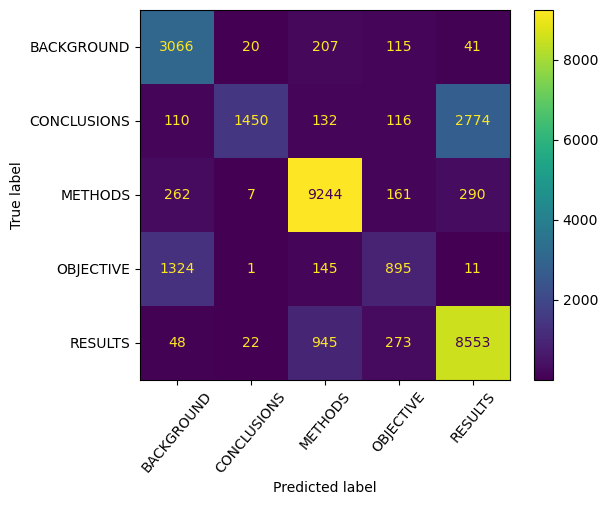

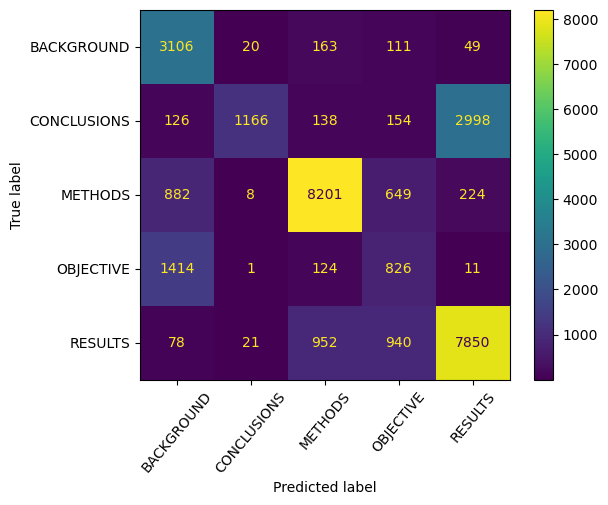

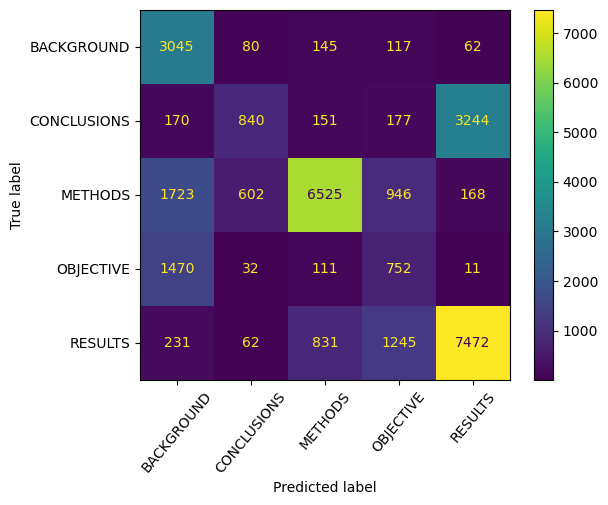

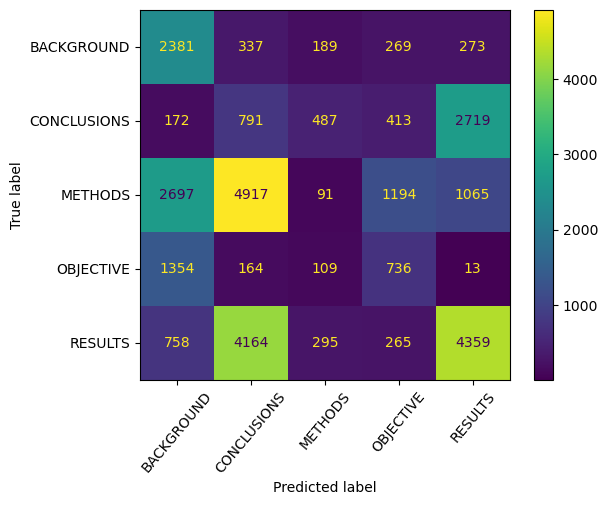

In [8]:
emp = []
for i in range(11):
    loaded_preds = val_dataset.predict(model=loaded, transition_weight = 0.1*i, remove=False)
    cm,df,mets = get_cm_and_final_results(loaded_preds, val_dataset.y)
    print(df)
    emp.append(mets)


In [16]:
x = (pd.DataFrame(emp).T)

In [25]:
x

,0,1,2,3,4,5,6,7,8,9,10
accuracy,84.340659,84.439958,84.446578,84.188402,83.337747,81.543757,79.326096,76.817159,70.001986,61.677479,27.664504
precision,0.849803,0.851302,0.852403,0.850997,0.844174,0.829777,0.812421,0.788890,0.745000,0.648800,0.262685
recall,0.843407,0.844400,0.844466,0.841884,0.833377,0.815438,0.793261,0.768172,0.700020,0.616775,0.276645
f1,0.839314,0.839886,0.839620,0.836389,0.826342,0.804378,0.775905,0.747340,0.685660,0.607936,0.249188


(84.0, 84.5)

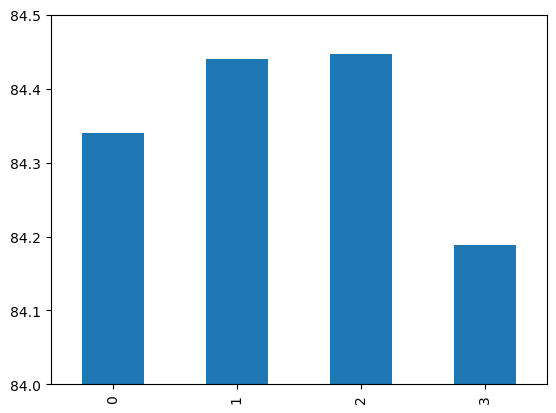

In [42]:
x.iloc[0][:4].plot(kind='bar')
plt.ylim(84,84.5)

(0.825, 0.855)

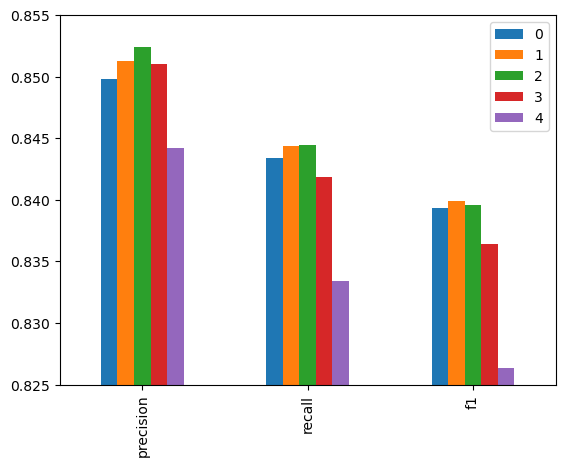

In [33]:
x.iloc[1:][np.arange(5)].plot(kind='bar',)
plt.ylim(0.825,0.855)

The best weight seems to lie around 0.2 and looks like it might lie close to 0.1 than 0.3.

In [44]:
preds = loaded.predict(val_dataset.pipeline)

945/945 [==============================] - 18s 18ms/step


            BACKGROUND  CONCLUSIONS  ...     macro avg  weighted avg
precision     0.661782     0.952421  ...      0.829346      0.851302
recall        0.837924     0.738324  ...      0.770083      0.844400
f1-score      0.739509     0.831817  ...      0.783972      0.839886
support    3449.000000  4582.000000  ...  30212.000000  30212.000000

[4 rows x 8 columns]
            BACKGROUND  CONCLUSIONS  ...     macro avg  weighted avg
precision     0.661560     0.952905  ...      0.829681      0.851430
recall        0.838794     0.737451  ...      0.769974      0.844400
f1-score      0.739709     0.831447  ...      0.783889      0.839853
support    3449.000000  4582.000000  ...  30212.000000  30212.000000

[4 rows x 8 columns]
            BACKGROUND  CONCLUSIONS  ...     macro avg  weighted avg
precision     0.662094     0.953350  ...      0.830351      0.851679
recall        0.839664     0.735923  ...      0.770067      0.844532
f1-score      0.740381     0.830644  ...      0.784105     

,0,1,2,3,4,5,6,7,8,9,10
accuracy,84.439958,84.439958,84.453197,84.443268,84.463127,84.476367,84.486297,84.496227,84.482987,84.463127,84.446578
precision,0.851302,0.851430,0.851679,0.851602,0.851906,0.852150,0.852399,0.852672,0.852663,0.852474,0.852403
recall,0.844400,0.844400,0.844532,0.844433,0.844631,0.844764,0.844863,0.844962,0.844830,0.844631,0.844466
f1,0.839886,0.839853,0.839953,0.839828,0.839979,0.840092,0.840181,0.840251,0.840051,0.839821,0.839620


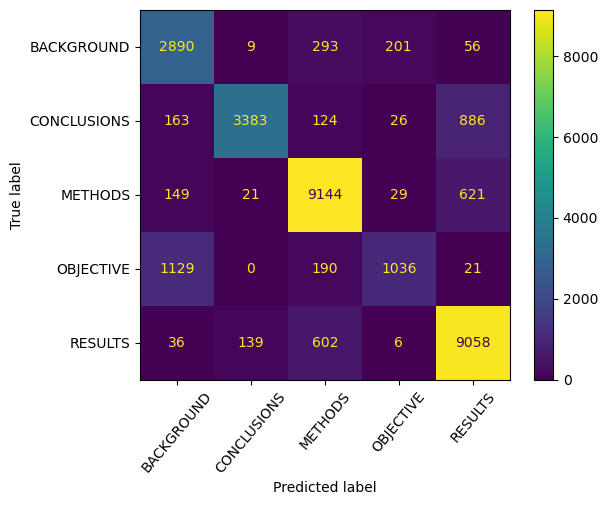

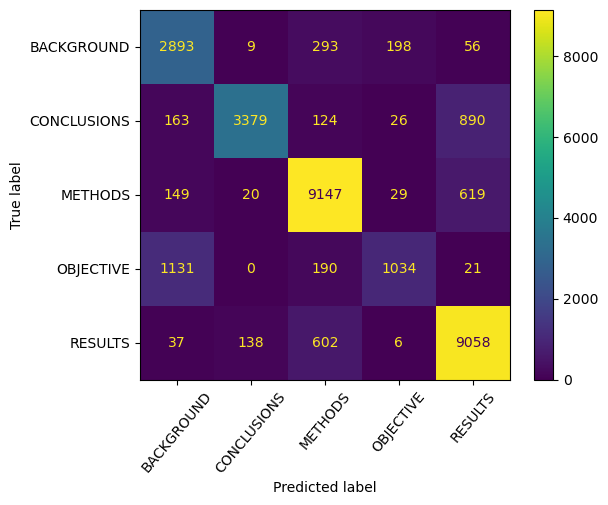

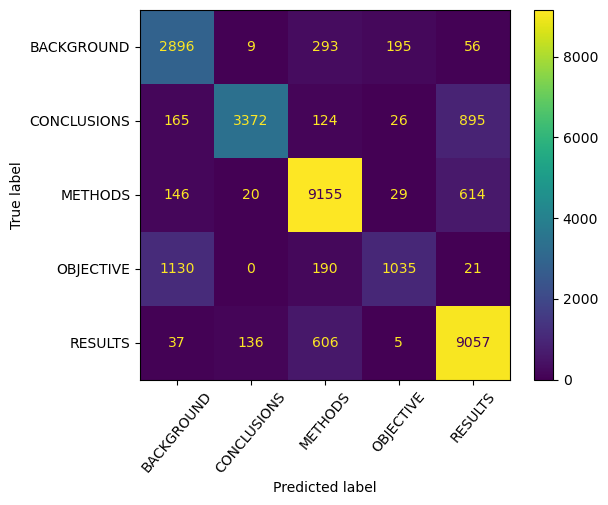

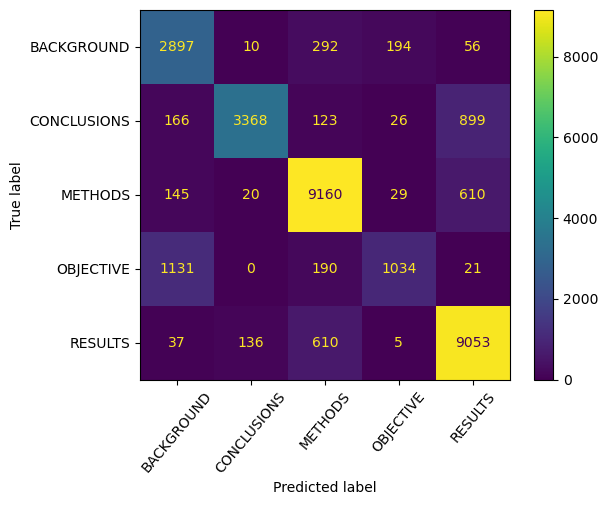

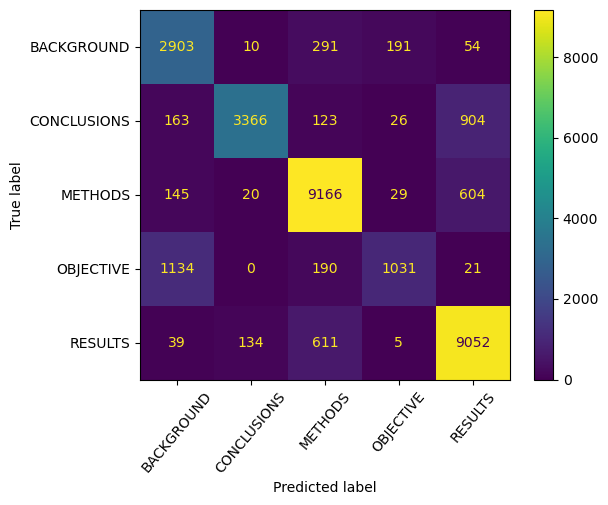

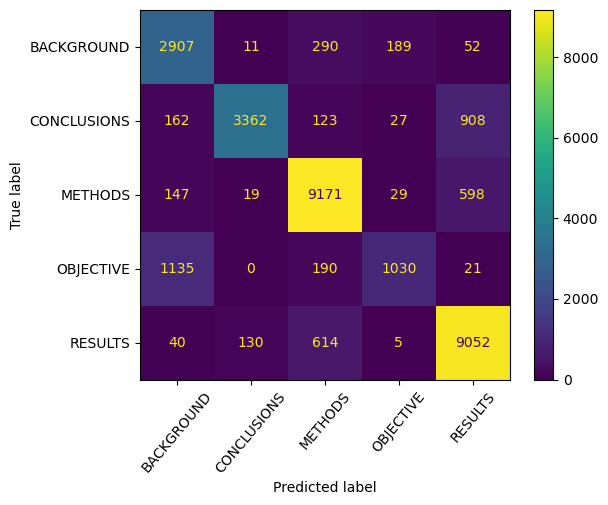

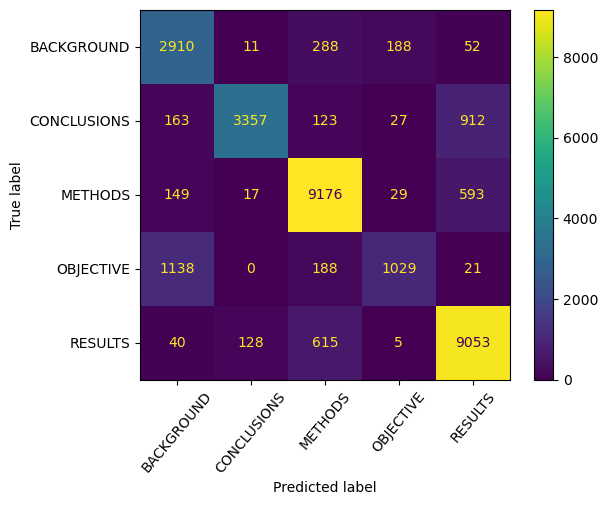

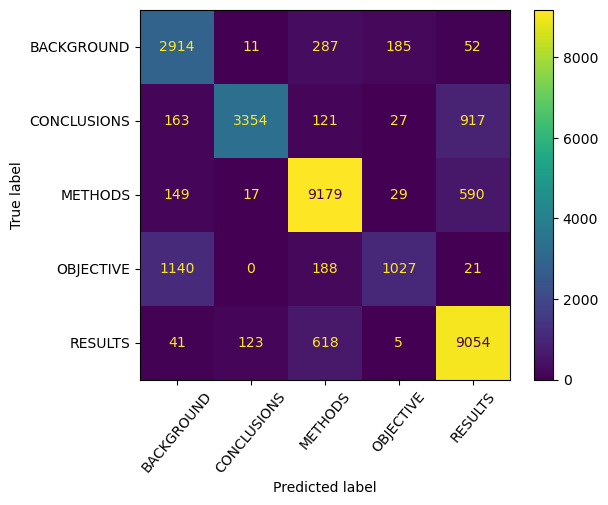

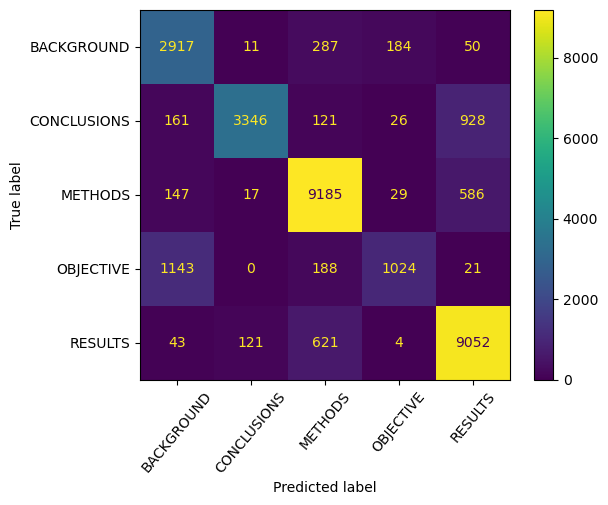

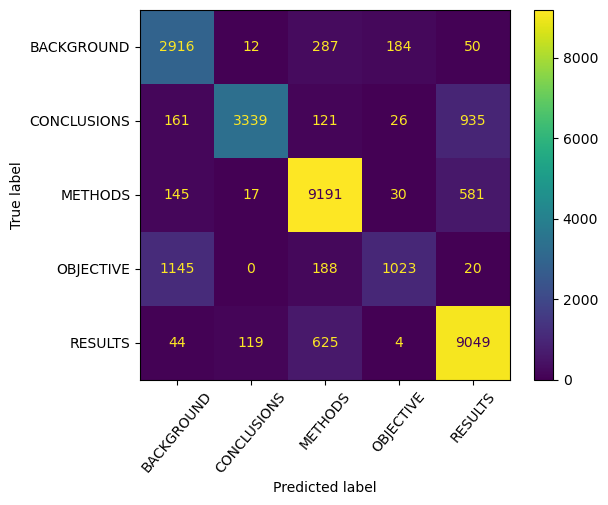

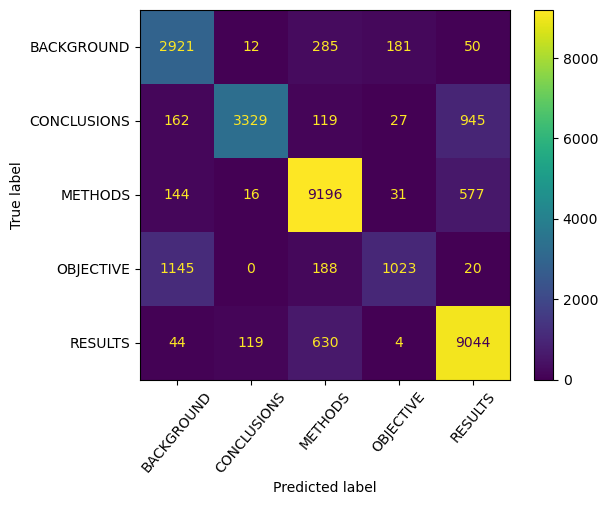

In [45]:
emp = []
for i in range(11):
    loaded_preds =  np.argmax(val_dataset.add_transition_probabilities(preds, (0.1 + 0.01*i)),axis=-1)
    cm,df,mets = get_cm_and_final_results(loaded_preds, val_dataset.y)
    print(df)
    emp.append(mets)
x = (pd.DataFrame(emp).T)
x

(84.43, 84.5)

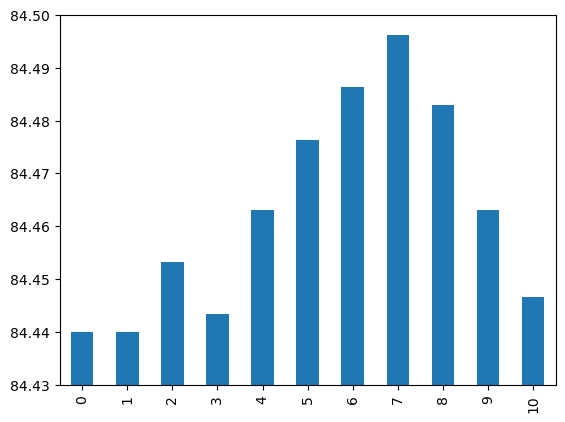

In [53]:
x.iloc[0].plot(kind='bar')
plt.ylim(84.43,84.5)

(0.85, 0.853)

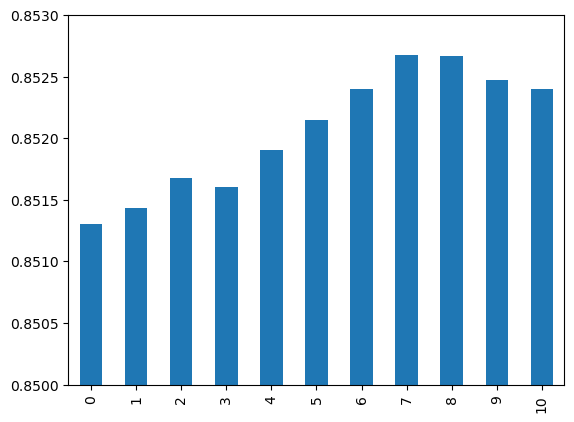

In [62]:
x.iloc[1].plot(kind='bar',)
plt.ylim(0.85,0.853)

(0.844, 0.845)

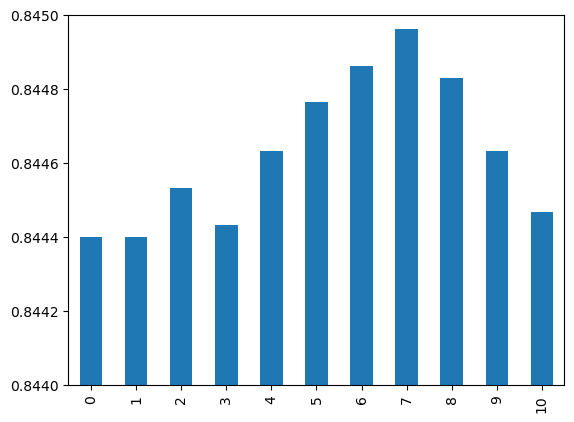

In [65]:
x.iloc[2].plot(kind='bar',)
plt.ylim(0.844,0.845)

(0.8395, 0.8404)

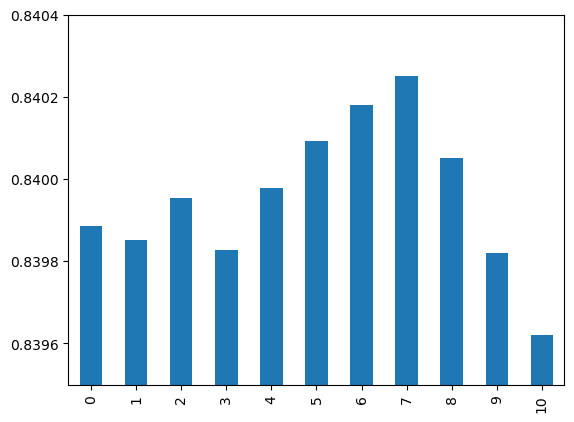

In [68]:
x.iloc[3].plot(kind='bar',)
plt.ylim(0.8395,0.8404)

`TRANSITION_WEIGHT` of 0.16 seems Ideal